In [2]:
import pandas as pd             # for dataframes
import numpy as np              # array math
import matplotlib.pyplot as plt # plots
import seaborn as sns           # fancy plots

In [37]:
# read data drom csv
df = pd.read_csv("wordle_word_list.csv")
df.head()

,INDEX,WORD
0,1,cigar
1,2,rebut
2,3,sissy
3,4,humph
4,5,awake


In [5]:
# alphabet list
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# add columns for all the letters
df = df.reindex(columns=[*df.columns.tolist(), 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], fill_value=0)

# Add 'true' to the letter column when that letter appears in the word (/!\ does not take into account if the letter is in twice!)
for i in range(len(alphabet)):
  df[alphabet[i]] = df['WORD'].str.contains(alphabet[i])

# replace trues with 1 and falses with 0 to help for calculating the sum of occurences
df = df.replace(True, 1)
df = df.replace(False, 0)
df.head()

,INDEX,WORD,a,b,c,d,e,f,g,h,...,q,r,s,t,u,v,w,x,y,z
0,1,cigar,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,rebut,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
2,3,sissy,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,humph,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,awake,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# function to split worrds into letters
def split_to_letters(word, pos):
    return [char for char in word][pos]

for i in range(5):
  idx = str(i+1)
  df[idx] = df['WORD'].apply(lambda x: split_to_letters(x, i))

df.head()

,INDEX,WORD,a,b,c,d,e,f,g,h,...,v,w,x,y,z,1,2,3,4,5
0,1,cigar,1,0,1,0,0,0,1,0,...,0,0,0,0,0,c,i,g,a,r
1,2,rebut,0,1,0,0,1,0,0,0,...,0,0,0,0,0,r,e,b,u,t
2,3,sissy,0,0,0,0,0,0,0,0,...,0,0,0,1,0,s,i,s,s,y
3,4,humph,0,0,0,0,0,0,0,1,...,0,0,0,0,0,h,u,m,p,h
4,5,awake,1,0,0,0,1,0,0,0,...,0,1,0,0,0,a,w,a,k,e


[Text(0.5, 1.0, '1st letter')]

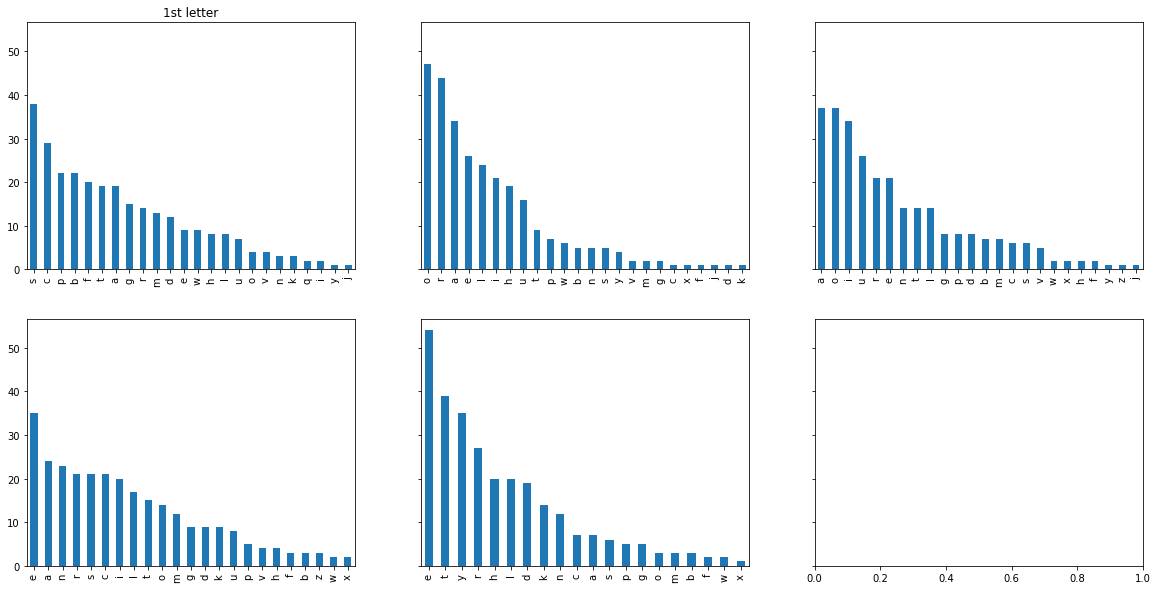

In [8]:
# plot the occurences of each letter
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = np.reshape(axes, -1)

df['1'].value_counts().plot.bar(ax = axes[0])
axes[0].set(title='1st letter')
df['2'].value_counts().plot.bar(ax = axes[1])
axes[].set(title='1st letter')
df['3'].value_counts().plot.bar(ax = axes[2])
axes[0].set(title='1st letter')
df['4'].value_counts().plot.bar(ax = axes[3])
axes[0].set(title='1st letter')
df['5'].value_counts().plot.bar(ax = axes[4])
axes[0].set(title='1st letter')

In [27]:
# create empty list
sums = []

# sum occurences in a row
for i in range(len(alphabet)):
    sums.append(df[alphabet[i]].sum()[0])

# create dictionary --> each letter corresponds to the number of occurences
letter_occurences = {alphabet[i]: sums[i] for i in range(len(alphabet))}

In [29]:
# function to find doubles
def finder(s):
    yield from {i for i, v in enumerate(s) if v in s[i+1:]}

# check for doubles: create column with the duplicate letters
df['duplicate letter'] = df['WORD'].apply(lambda x: list(set(x[i] for i in finder(x))))

# count the amount of duplicates: create column with the amount of duplicate letter (1 means i.e. 'a' is in twice)
df['duplicates?'] = df['duplicate letter'].apply(lambda x: len(x))
df.head()

,INDEX,WORD,a,b,c,d,e,f,g,h,...,x,y,z,1,2,3,4,5,duplicate letter,duplicates?
0,1,cigar,1,0,1,0,0,0,1,0,...,0,0,0,c,i,g,a,r,[],0
1,2,rebut,0,1,0,0,1,0,0,0,...,0,0,0,r,e,b,u,t,[],0
2,3,sissy,0,0,0,0,0,0,0,0,...,0,1,0,s,i,s,s,y,[s],1
3,4,humph,0,0,0,0,0,0,0,1,...,0,0,0,h,u,m,p,h,[h],1
4,5,awake,1,0,0,0,1,0,0,0,...,0,0,0,a,w,a,k,e,[a],1


In [30]:
# Calculate amount of words with duplicates
ratio_duplicates = len(df[df['duplicates?'] > 0]) / len(df[df['duplicates?'] == 0])
print('Words with duplicate letters: ', len(df[df['duplicates?'] > 0]))
print('Words without duplicate letters: ', len(df[df['duplicates?'] == 0]))
print('Ratio words with duplicate letters / words without: ', round(ratio_duplicates, 2))

Words with duplicate letters:  92
Words without duplicate letters:  192
Ratio words with duplicate letters / words without:  0.48


In [31]:
# create a list that counts the duplicates
duplicate_letters = []
for i in range(len(df['duplicate letter'])):
    if len(df['duplicate letter'][i]) == 1:
        duplicate_letters.append(df['duplicate letter'][i][0])
    if len(df['duplicate letter'][i]) == 2:
        duplicate_letters.append(df['duplicate letter'][i][0])
        duplicate_letters.append(df['duplicate letter'][i][1])
duplicate_letters

# counter for duplicates
sum_duplicates = [0]*26
for i in range(len(alphabet)):
    for j in range(len(duplicate_letters)):
        if alphabet[i] == duplicate_letters[j]:
              sum_duplicates[i] = sum_duplicates[i] + 1
total = [x + y for x, y in zip(sum_duplicates, sums)]

# occurence in english: based on wikipedia letter frequency
# https://en.wikipedia.org/wiki/Letter_frequency
wikipedia_dictionary = [7.8, 2, 4, 5.8, 11, 1.4, 3, 2.3, 8.2, 0.74, 2.7, 5.6,
                        6.8, 7.2, 6.1, 2.8, 0.24, 7.3, 8.7, 6.7, 3.3, 1, 0.91, 0.27, 1.6, 0.44]

# create dataframe with the occurences of letters
# init empty dataframe
df_letters = pd.DataFrame()
# add letter as column headers
df_letters = df_letters.reindex(columns=['letter', 'occurence without duplicates', 'occurence duplicates', 'total occurence', 'occurence in en'])
df_letters['letter'] = alphabet
df_letters['occurence without duplicates'] = sums
df_letters['occurence duplicates'] = sum_duplicates
df_letters['total occurence'] = df_letters['occurence without duplicates'] + df_letters['occurence duplicates']
df_letters['occurence in en'] = wikipedia_dictionary
df_letters.head()

,letter,occurence without duplicates,occurence duplicates,total occurence,occurence in en
0,a,108,13,121,7.8
1,b,36,4,40,2.0
2,c,58,6,64,4.0
3,d,48,1,49,5.8
4,e,129,16,145,11.0


In [32]:
df_letters['occurence in en'].sum() # fuck up here, should be 100% --> problem in source

107.89999999999999

[Text(0.5, 1.0, 'Occurences of letters in wordle words')]

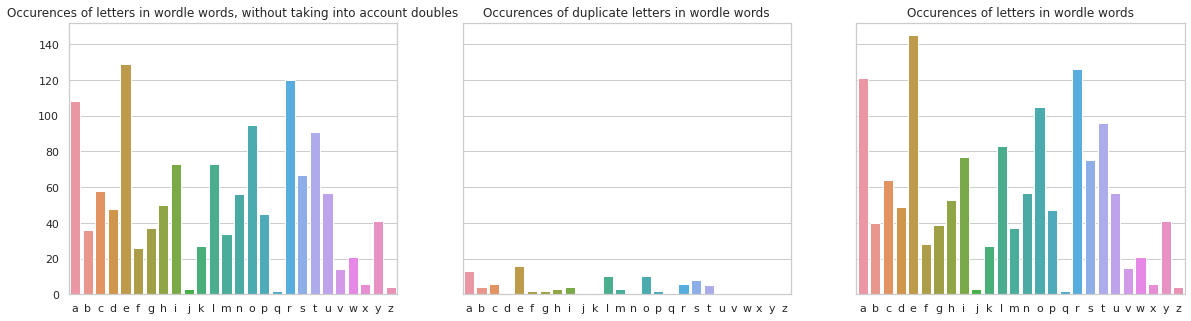

In [33]:
# plot the occurences of each letter
sns.set(style="whitegrid")

#plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
axes = np.reshape(axes, -1)
sns.set_color_codes("muted")

sns.barplot(ax=axes[0], x=alphabet, y=sums)
axes[0].set(title='Occurences of letters in wordle words, without taking into account doubles')
sns.barplot(ax=axes[1], x=alphabet, y=sum_duplicates)
axes[1].set(title='Occurences of duplicate letters in wordle words')
sns.barplot(ax=axes[2], x=alphabet, y=total)
axes[2].set(title='Occurences of letters in wordle words')

In [34]:
#df_letters['total occurence'].sort_values(ascending=False)[0:5]
print('The most common wordle letters so far are: ', df_letters.sort_values('total occurence', ascending=False)[0:5]['letter'].tolist())

The most common wordle letters so far are:  ['e', 'r', 'a', 'o', 't']


<h1>Difference between wordle occurence and english occurence</h1>

<AxesSubplot:xlabel='letter', ylabel='value'>

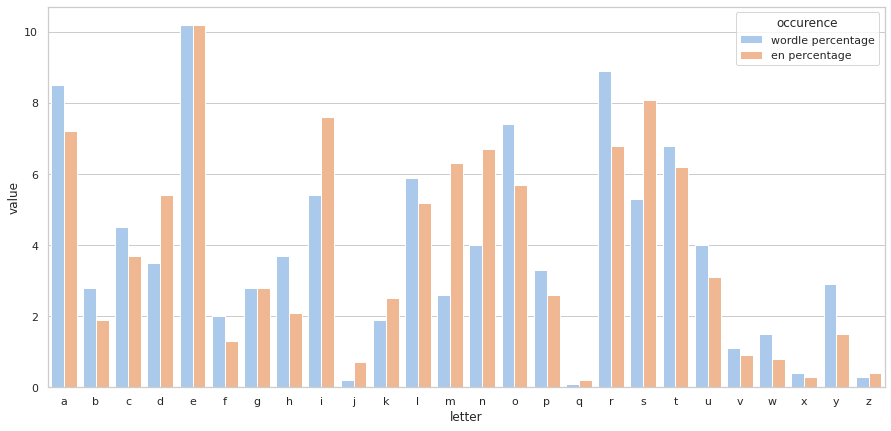

In [35]:
# normalise
df_letters['wordle percentage'] = (df_letters['total occurence'] * 100 / df_letters['total occurence'].sum()).round(1)
df_letters['en percentage'] = (df_letters['occurence in en'] * 100 / df_letters['occurence in en'].sum()).round(1)

# plot wordle words vs english dictionaries
plt.figure(figsize=(15,7))
df1 = pd.melt(df_letters, id_vars=['letter'], value_vars=['wordle percentage', 'en percentage'], var_name='occurence')
sns.set_color_codes("pastel")
sns.barplot(x="letter", y="value", hue="occurence", data=df1, palette='pastel')

In [36]:
# which is letter is more frequent
def letter_more_frequent(s):
    if s['wordle percentage'] > s['en percentage']:
        return 'wordle'
    if s['en percentage'] > s['wordle percentage']:
        return 'English'
    else:
        return 'draw'

df_letters['more frequent'] = df_letters.apply(letter_more_frequent, axis=1)

print('More frequent in Wordle: ', df_letters[df_letters['more frequent'] == 'wordle'].letter.tolist())
print('More frequent in English: ', df_letters[df_letters['more frequent'] == 'English'].letter.tolist())

More frequent in Wordle:  ['a', 'b', 'c', 'f', 'h', 'l', 'o', 'p', 'r', 't', 'u', 'v', 'w', 'x', 'y']
More frequent in English:  ['d', 'i', 'j', 'k', 'm', 'n', 'q', 's', 'z']
